<a href="https://colab.research.google.com/github/74obunga/Sales-Analysis-Report-for-Chain-Stores/blob/main/Key_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install PySpark
!pip install pyspark openpyxl

# Import necessary libraries
from pyspark.sql import SparkSession
import pandas as pd

# Initiate Spark session
spark = SparkSession.builder.appName("Sales Data Analysis").getOrCreate()


In [5]:
# Load the Excel file into a Pandas DataFrame and convert to Spark DataFrame
sales_data = pd.read_excel('Sales Data For Chain Stores.xlsx')
sales_df = spark.createDataFrame(sales_data)
sales_df.show()  # Display first few rows


+-----+--------+-------------------+--------+------+---------+
|Store|Category|               Date|   Sales|Margin|     City|
+-----+--------+-------------------+--------+------+---------+
|    1|       1|2020-01-06 00:00:00| 24924.5|0.5432|Vancouver|
|    1|       2|2020-01-06 00:00:00|50605.27|0.5432|Vancouver|
|    1|       3|2020-01-06 00:00:00|13740.12|0.5432|Vancouver|
|    1|       4|2020-01-06 00:00:00|39954.04|0.5432|Vancouver|
|    1|       5|2020-01-06 00:00:00|32229.38|0.5432|Vancouver|
|    1|       6|2020-01-06 00:00:00| 5749.03|0.5432|Vancouver|
|    1|       7|2020-01-06 00:00:00|21084.08|0.5432|Vancouver|
|    1|       8|2020-01-06 00:00:00|40129.01|0.5432|Vancouver|
|    1|       9|2020-01-06 00:00:00|16930.99|0.5432|Vancouver|
|    1|      10|2020-01-06 00:00:00| 30721.5|0.5859|Vancouver|
|    1|       1|2020-01-06 00:00:00|24213.18|0.5859|Vancouver|
|    1|       2|2020-01-06 00:00:00| 8449.54|0.5859|Vancouver|
|    1|       3|2020-01-06 00:00:00|41969.29|0.5859|Van

In [6]:
# Group the data by City and Store, and sum the Sales
from pyspark.sql.functions import sum as _sum

# Group by City and Store, summing the Sales column
sales_per_store_city = sales_df.groupBy("City", "Store").agg(_sum("Sales").alias("Total_Sales"))

# Show the result
sales_per_store_city.show(truncate=False)


+---------+-----+--------------------+
|City     |Store|Total_Sales         |
+---------+-----+--------------------+
|Tokyo    |17   |8.925519604194638E7 |
|Vancouver|6    |1.3411886532054098E8|
|Vancouver|3    |5.009453246922442E7 |
|Tokyo    |38   |2.1128546556594554E7|
|Tokyo    |36   |1.2191159577547727E7|
|Tokyo    |28   |1.0930552263296437E8|
|Tokyo    |30   |2.4931580481808983E7|
|Tokyo    |39   |1.1344526599942258E8|
|Seoul    |13   |1.715207617923113E8 |
|Tokyo    |25   |7.606325573857203E7 |
|Tokyo    |40   |6.734164432092163E7 |
|Tokyo    |20   |1.716815074909191E8 |
|Tokyo    |23   |1.4815676796748832E8|
|Tokyo    |24   |1.0069014596954277E8|
|Vancouver|2    |1.4270980793202156E8|
|Tokyo    |27   |1.497095562269185E8 |
|Vancouver|9    |6.267026924947404E7 |
|Tokyo    |21   |8.405881857914782E7 |
|Tokyo    |18   |1.1572690383387451E8|
|Tokyo    |31   |9.475019119956523E7 |
+---------+-----+--------------------+
only showing top 20 rows



In [7]:
# Convert the Spark DataFrame to Pandas DataFrame for visualization
sales_per_store_city_pd = sales_per_store_city.toPandas()


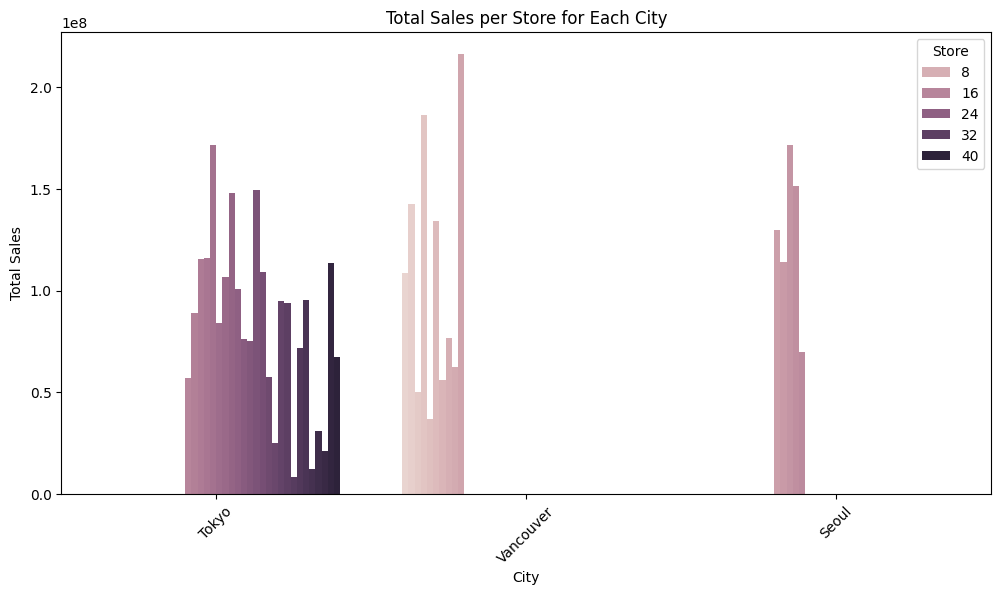

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sales per store for each city
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_per_store_city_pd, x="City", y="Total_Sales", hue="Store")
plt.title("Total Sales per Store for Each City")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.xlabel("City")
plt.show()


In [9]:
# Group by Store and sum the Sales column
sales_per_store = sales_df.groupBy("Store").agg(_sum("Sales").alias("Total_Sales"))

# Show the result
sales_per_store.show(truncate=False)


+-----+--------------------+
|Store|Total_Sales         |
+-----+--------------------+
|26   |7.51149740656578E7  |
|29   |5.776798770941049E7 |
|19   |1.1603945658999024E8|
|22   |1.0686137525278473E8|
|7    |5.623895065345713E7 |
|34   |7.168546394501238E7 |
|32   |9.37426743846933E7  |
|31   |9.475019119956523E7 |
|39   |1.1344526599942258E8|
|25   |7.606325573857203E7 |
|6    |1.3411886532054098E8|
|9    |6.267026924947404E7 |
|27   |1.497095562269185E8 |
|17   |8.925519604194638E7 |
|28   |1.0930552263296437E8|
|33   |8410759.995854024   |
|5    |3.6733301780411825E7|
|1    |1.0885801524709068E8|
|10   |2.1626301226131994E8|
|3    |5.009453246922442E7 |
+-----+--------------------+
only showing top 20 rows



In [10]:
# Convert Spark DataFrame to Pandas for visualization
sales_per_store_pd = sales_per_store.toPandas()


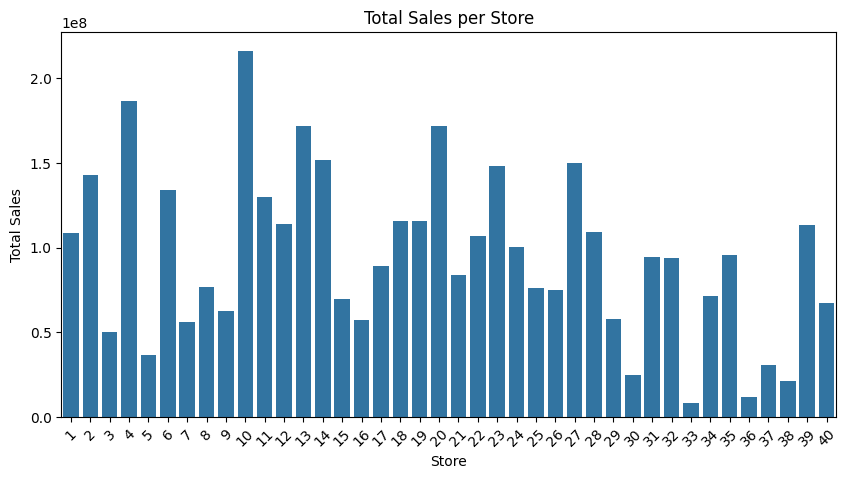

In [11]:
# Plot total sales per store
plt.figure(figsize=(10, 5))
sns.barplot(data=sales_per_store_pd, x="Store", y="Total_Sales")
plt.title("Total Sales per Store")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.xlabel("Store")
plt.show()

In [12]:
# Group by City and Store, and sum the Sales
sales_per_store_city = sales_df.groupBy("City", "Store").agg(_sum("Sales").alias("Total_Sales"))

# Show the result
sales_per_store_city.show(truncate=False)


+---------+-----+--------------------+
|City     |Store|Total_Sales         |
+---------+-----+--------------------+
|Tokyo    |17   |8.925519604194638E7 |
|Vancouver|6    |1.3411886532054098E8|
|Vancouver|3    |5.009453246922442E7 |
|Tokyo    |38   |2.1128546556594554E7|
|Tokyo    |36   |1.2191159577547727E7|
|Tokyo    |28   |1.0930552263296437E8|
|Tokyo    |30   |2.4931580481808983E7|
|Tokyo    |39   |1.1344526599942258E8|
|Seoul    |13   |1.715207617923113E8 |
|Tokyo    |25   |7.606325573857203E7 |
|Tokyo    |40   |6.734164432092163E7 |
|Tokyo    |20   |1.716815074909191E8 |
|Tokyo    |23   |1.4815676796748832E8|
|Tokyo    |24   |1.0069014596954277E8|
|Vancouver|2    |1.4270980793202156E8|
|Tokyo    |27   |1.497095562269185E8 |
|Vancouver|9    |6.267026924947404E7 |
|Tokyo    |21   |8.405881857914782E7 |
|Tokyo    |18   |1.1572690383387451E8|
|Tokyo    |31   |9.475019119956523E7 |
+---------+-----+--------------------+
only showing top 20 rows



In [13]:
# Convert Spark DataFrame to Pandas for visualization
sales_per_store_city_pd = sales_per_store_city.toPandas()


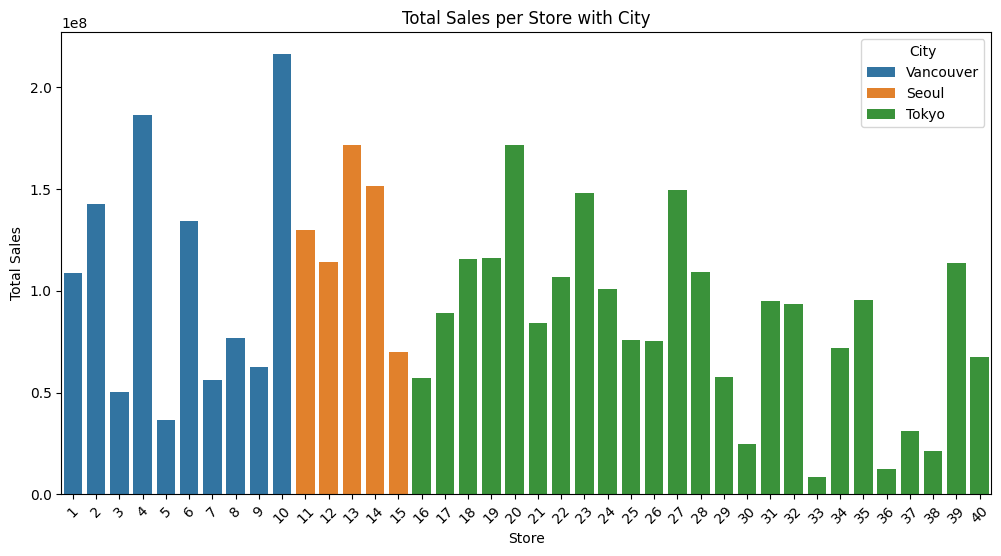

In [14]:
# Plot total sales per store with city
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_per_store_city_pd, x="Store", y="Total_Sales", hue="City")
plt.title("Total Sales per Store with City")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.xlabel("Store")
plt.show()

In [15]:
# Group by Date and sum the Sales column
sales_trend = sales_df.groupBy("Date").agg(_sum("Sales").alias("Total_Sales"))

# Show the result
sales_trend.show(truncate=False)


+-------------------+--------------------+
|Date               |Total_Sales         |
+-------------------+--------------------+
|2020-03-31 00:00:00|2.2541598220000055E7|
|2021-07-06 00:00:00|2.4303200178000003E7|
|2021-03-16 00:00:00|2.2615589819999993E7|
|2021-04-20 00:00:00|2.1961647030000024E7|
|2021-01-05 00:00:00|2.1676416860000048E7|
|2020-09-15 00:00:00|2.170526791000003E7 |
|2020-01-06 00:00:00|2.394122474000002E7 |
|2020-03-10 00:00:00|2.4839983970000044E7|
|2020-06-02 00:00:00|2.5108047119999982E7|
|2020-10-06 00:00:00|2.354321327000003E7 |
|2020-03-03 00:00:00|2.7017449900000058E7|
|2020-12-22 00:00:00|1.9417053420000017E7|
|2020-08-11 00:00:00|2.2537823280000016E7|
|2020-12-29 00:00:00|1.9154429089999996E7|
|2020-02-24 00:00:00|2.3125154229999993E7|
|2020-08-18 00:00:00|2.125153323000001E7 |
|2020-09-01 00:00:00|2.1414753240000047E7|
|2021-06-22 00:00:00|2.3036092679999974E7|
|2020-04-21 00:00:00|2.2973832930000026E7|
|2020-11-17 00:00:00|3.420309957000001E7 |
+----------

In [16]:
# Convert the Spark DataFrame to Pandas for visualization
sales_trend_pd = sales_trend.toPandas()

# Ensure the Date column is in datetime format for proper plotting
sales_trend_pd['Date'] = pd.to_datetime(sales_trend_pd['Date'])


In [17]:
# Sort the data by Date for plotting
sales_trend_pd = sales_trend_pd.sort_values('Date')


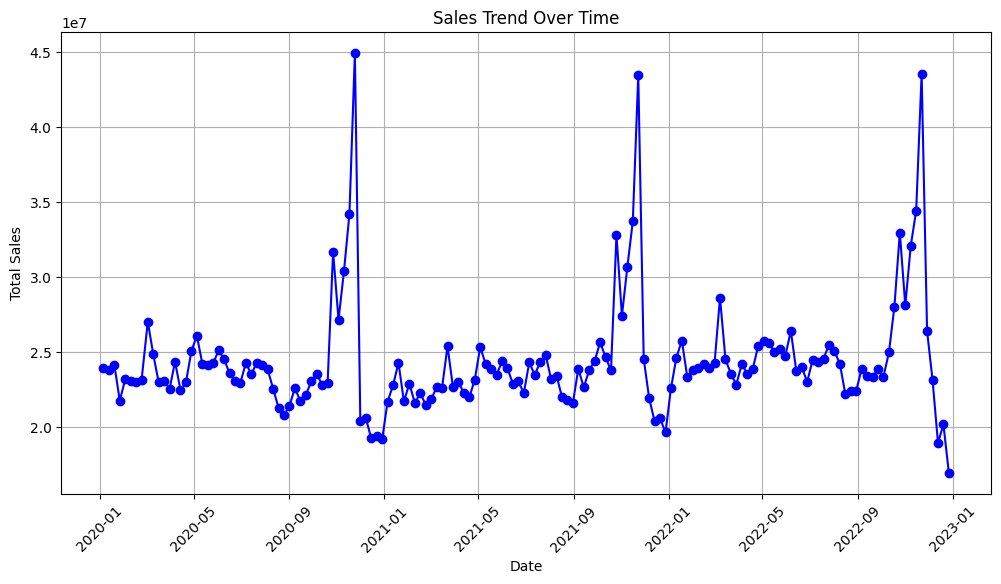

In [18]:
# Plot the sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(sales_trend_pd['Date'], sales_trend_pd['Total_Sales'], marker='o', linestyle='-', color='b')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [19]:
# Group by Store and sum the Sales column
sales_per_store = sales_df.groupBy("Store").agg(_sum("Sales").alias("Total_Sales"))

# Show the result
sales_per_store.show(truncate=False)


+-----+--------------------+
|Store|Total_Sales         |
+-----+--------------------+
|26   |7.51149740656578E7  |
|29   |5.776798770941049E7 |
|19   |1.1603945658999024E8|
|22   |1.0686137525278473E8|
|7    |5.623895065345713E7 |
|34   |7.168546394501238E7 |
|32   |9.37426743846933E7  |
|31   |9.475019119956523E7 |
|39   |1.1344526599942258E8|
|25   |7.606325573857203E7 |
|6    |1.3411886532054098E8|
|9    |6.267026924947404E7 |
|27   |1.497095562269185E8 |
|17   |8.925519604194638E7 |
|28   |1.0930552263296437E8|
|33   |8410759.995854024   |
|5    |3.6733301780411825E7|
|1    |1.0885801524709068E8|
|10   |2.1626301226131994E8|
|3    |5.009453246922442E7 |
+-----+--------------------+
only showing top 20 rows



In [20]:
from pyspark.sql.window import Window
from pyspark.sql.functions import dense_rank, desc

# Define a window specification to rank stores based on Total Sales
window_spec = Window.orderBy(desc("Total_Sales"))

# Add a rank column
sales_per_store_ranked = sales_per_store.withColumn("Rank", dense_rank().over(window_spec))

# Show the ranked sales per store
sales_per_store_ranked.show(truncate=False)


+-----+--------------------+----+
|Store|Total_Sales         |Rank|
+-----+--------------------+----+
|10   |2.1626301226131994E8|1   |
|4    |1.8644191099214274E8|2   |
|20   |1.716815074909191E8 |3   |
|13   |1.715207617923113E8 |4   |
|14   |1.5158094013759995E8|5   |
|27   |1.497095562269185E8 |6   |
|23   |1.4815676796748832E8|7   |
|2    |1.4270980793202156E8|8   |
|6    |1.3411886532054098E8|9   |
|11   |1.2992604221769238E8|10  |
|19   |1.1603945658999024E8|11  |
|18   |1.1572690383387451E8|12  |
|12   |1.14127236786438E8  |13  |
|39   |1.1344526599942258E8|14  |
|28   |1.0930552263296437E8|15  |
|1    |1.0885801524709068E8|16  |
|22   |1.0686137525278473E8|17  |
|24   |1.0069014596954277E8|18  |
|35   |9.558717095516163E7 |19  |
|31   |9.475019119956523E7 |20  |
+-----+--------------------+----+
only showing top 20 rows



**1. Total Sales per Store**

By calculating the total sales for each store, providing a snapshot of how individual stores performed. This metric highlights the disparity in sales volumes across the stores

In [21]:
# Convert Spark DataFrame to Pandas for easier visualization
sales_per_store_ranked_pd = sales_per_store_ranked.toPandas()


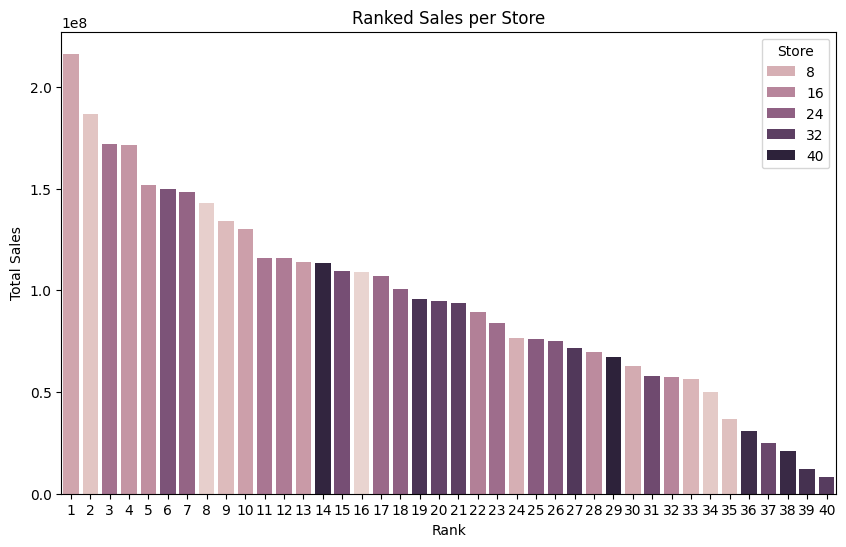

In [22]:


# Plot ranked sales per store
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_per_store_ranked_pd, x="Rank", y="Total_Sales", hue="Store")
plt.title("Ranked Sales per Store")
plt.xlabel("Rank")
plt.ylabel("Total Sales")
plt.show()


In [23]:
# Group by City and Store, and sum the Sales
sales_per_store_city = sales_df.groupBy("City", "Store").agg(_sum("Sales").alias("Total_Sales"))

# Show the result
sales_per_store_city.show(truncate=False)


+---------+-----+--------------------+
|City     |Store|Total_Sales         |
+---------+-----+--------------------+
|Tokyo    |17   |8.925519604194638E7 |
|Vancouver|6    |1.3411886532054098E8|
|Vancouver|3    |5.009453246922442E7 |
|Tokyo    |38   |2.1128546556594554E7|
|Tokyo    |36   |1.2191159577547727E7|
|Tokyo    |28   |1.0930552263296437E8|
|Tokyo    |30   |2.4931580481808983E7|
|Tokyo    |39   |1.1344526599942258E8|
|Seoul    |13   |1.715207617923113E8 |
|Tokyo    |25   |7.606325573857203E7 |
|Tokyo    |40   |6.734164432092163E7 |
|Tokyo    |20   |1.716815074909191E8 |
|Tokyo    |23   |1.4815676796748832E8|
|Tokyo    |24   |1.0069014596954277E8|
|Vancouver|2    |1.4270980793202156E8|
|Tokyo    |27   |1.497095562269185E8 |
|Vancouver|9    |6.267026924947404E7 |
|Tokyo    |21   |8.405881857914782E7 |
|Tokyo    |18   |1.1572690383387451E8|
|Tokyo    |31   |9.475019119956523E7 |
+---------+-----+--------------------+
only showing top 20 rows



In [24]:
from pyspark.sql.window import Window
from pyspark.sql.functions import dense_rank, desc

# Define a window specification to rank stores within each city based on Total Sales
window_spec = Window.partitionBy("City").orderBy(desc("Total_Sales"))

# Add a rank column within each city
sales_per_store_city_ranked = sales_per_store_city.withColumn("Rank", dense_rank().over(window_spec))

# Show the ranked sales per store in each city
sales_per_store_city_ranked.show(truncate=False)


+-----+-----+--------------------+----+
|City |Store|Total_Sales         |Rank|
+-----+-----+--------------------+----+
|Seoul|13   |1.715207617923113E8 |1   |
|Seoul|14   |1.5158094013759995E8|2   |
|Seoul|11   |1.2992604221769238E8|3   |
|Seoul|12   |1.14127236786438E8  |4   |
|Seoul|15   |6.978477443831497E7 |5   |
|Tokyo|20   |1.716815074909191E8 |1   |
|Tokyo|27   |1.497095562269185E8 |2   |
|Tokyo|23   |1.4815676796748832E8|3   |
|Tokyo|19   |1.1603945658999024E8|4   |
|Tokyo|18   |1.1572690383387451E8|5   |
|Tokyo|39   |1.1344526599942258E8|6   |
|Tokyo|28   |1.0930552263296437E8|7   |
|Tokyo|22   |1.0686137525278473E8|8   |
|Tokyo|24   |1.0069014596954277E8|9   |
|Tokyo|35   |9.558717095516163E7 |10  |
|Tokyo|31   |9.475019119956523E7 |11  |
|Tokyo|32   |9.37426743846933E7  |12  |
|Tokyo|17   |8.925519604194638E7 |13  |
|Tokyo|21   |8.405881857914782E7 |14  |
|Tokyo|25   |7.606325573857203E7 |15  |
+-----+-----+--------------------+----+
only showing top 20 rows



**1. Total Sales per Store**

**We now Visualize each store sales for all the cities**

In [25]:
# Convert Spark DataFrame to Pandas for visualization
sales_per_store_city_ranked_pd = sales_per_store_city_ranked.toPandas()


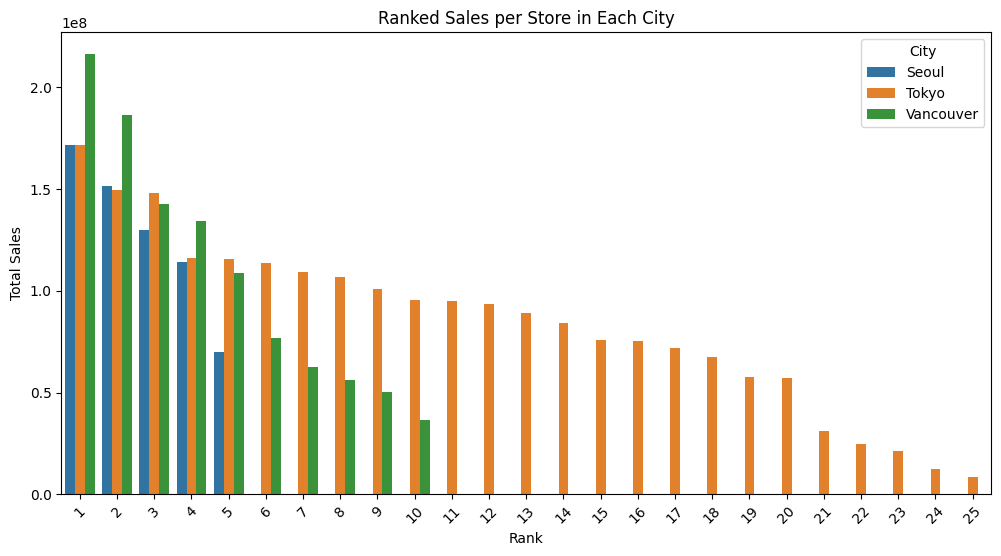

In [26]:
# Plot ranked sales per store for each city
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_per_store_city_ranked_pd, x="Rank", y="Total_Sales", hue="City")
plt.title("Ranked Sales per Store in Each City")
plt.ylabel("Total Sales")
plt.xlabel("Rank")
plt.xticks(rotation=45)
plt.show()

The stores in Vancouver recorded higher sales than the Stores in Tokyo and Seoul
Migt be because the customer need for our brand with liited number of stores in this Particular city.

In [27]:
# Group by City and Date, summing the Sales column
sales_trend_city = sales_df.groupBy("City", "Date").agg(_sum("Sales").alias("Total_Sales"))

# Show the result
sales_trend_city.show(truncate=False)


+---------+-------------------+--------------------+
|City     |Date               |Total_Sales         |
+---------+-------------------+--------------------+
|Tokyo    |2020-01-13 00:00:00|1.2840968490000013E7|
|Seoul    |2020-02-24 00:00:00|3895169.3299999996  |
|Vancouver|2020-07-28 00:00:00|6435480.729999998   |
|Tokyo    |2021-04-20 00:00:00|1.2328683410000011E7|
|Tokyo    |2020-03-03 00:00:00|1.4966950290000003E7|
|Vancouver|2020-04-21 00:00:00|6351127.300000001   |
|Seoul    |2020-01-13 00:00:00|3859742.14          |
|Tokyo    |2020-06-23 00:00:00|1.2961647920000015E7|
|Seoul    |2020-10-27 00:00:00|5403551.929999999   |
|Tokyo    |2020-04-21 00:00:00|1.2875829140000012E7|
|Vancouver|2020-02-10 00:00:00|6567346.259999998   |
|Tokyo    |2020-04-07 00:00:00|1.3575611420000007E7|
|Seoul    |2021-06-29 00:00:00|3603629.3799999985  |
|Tokyo    |2020-02-03 00:00:00|1.2568030300000006E7|
|Vancouver|2020-09-01 00:00:00|6049616.3500000015  |
|Seoul    |2020-06-23 00:00:00|3745853.7300000

** Sales Trend Over Time**

Next, I examined how sales evolved over time by creating a trend analysis. The line plot showcased the fluctuations in sales, helping identify peaks and troughs throughout the period.

In [28]:
# Convert the Spark DataFrame to Pandas DataFrame for visualization
sales_trend_city_pd = sales_trend_city.toPandas()

# Ensure the Date column is in datetime format for proper plotting
sales_trend_city_pd['Date'] = pd.to_datetime(sales_trend_city_pd['Date'])


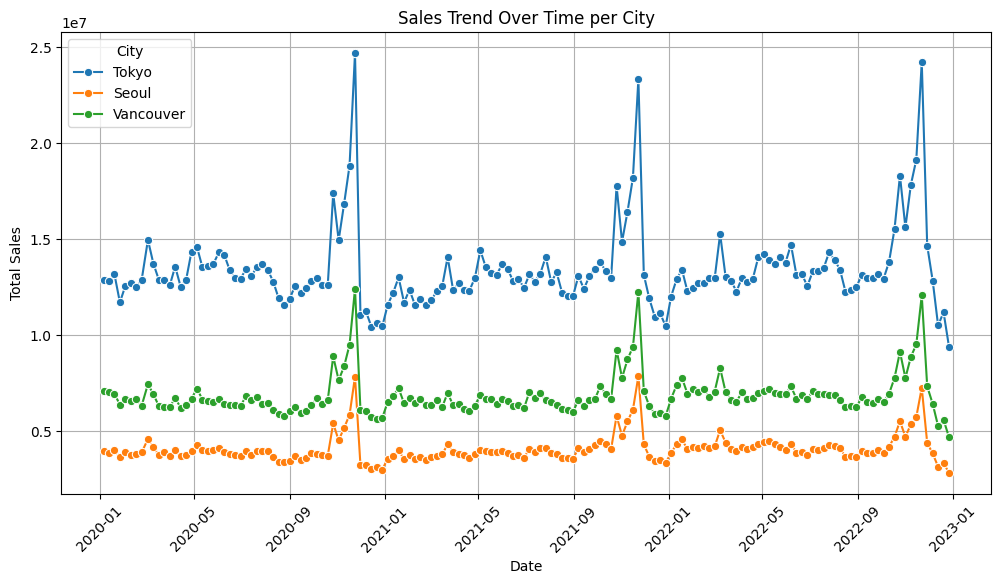

In [29]:
# Plot sales trend per city using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend_city_pd, x='Date', y='Total_Sales', hue='City', marker='o')

# Add titles and labels
plt.title("Sales Trend Over Time per City")
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="City")
plt.show()

More sales were recorde in September than the rest of the time for all the cities Every year

**To visualize sales per city using Vrious visualization method, we can explore several options such as:**

1. Pie Chart: To show the proportion of total sales for each city
2. Line Plot: To show trends over time if grouped by city.
3. Donut Chart: A variation of the pie chart.
4. Area Plot: To visualize cumulative sales for each city. **bold text**

In [30]:
# Group by City and sum the Sales column
sales_per_city = sales_df.groupBy("City").agg(_sum("Sales").alias("Total_Sales"))

# Show the result
sales_per_city.show(truncate=False)


+---------+--------------------+
|City     |Total_Sales         |
+---------+--------------------+
|Tokyo    |2.091795256879178E9 |
|Vancouver|1.0707557950106583E9|
|Seoul    |6.369397553723574E8 |
+---------+--------------------+



In [31]:
# Convert Spark DataFrame to Pandas DataFrame for visualization
sales_per_city_pd = sales_per_city.toPandas()


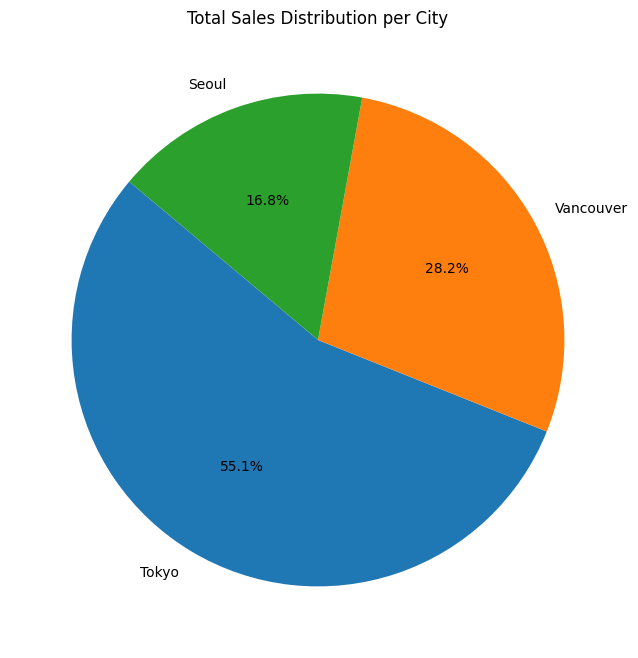

In [32]:
import matplotlib.pyplot as plt

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_per_city_pd['Total_Sales'], labels=sales_per_city_pd['City'], autopct='%1.1f%%', startangle=140)
plt.title("Total Sales Distribution per City")
plt.show()


From the pie chart we can clearly see that tMore sales were recorded in Tokyo than the rest of the cities. This is probably due to:


1.   More number of stores in Tokyo than the rest of the cities
2.   Mraket preference in Tokyo more than the other cities. There are more people in Tokyo that loves our brand and commodities.


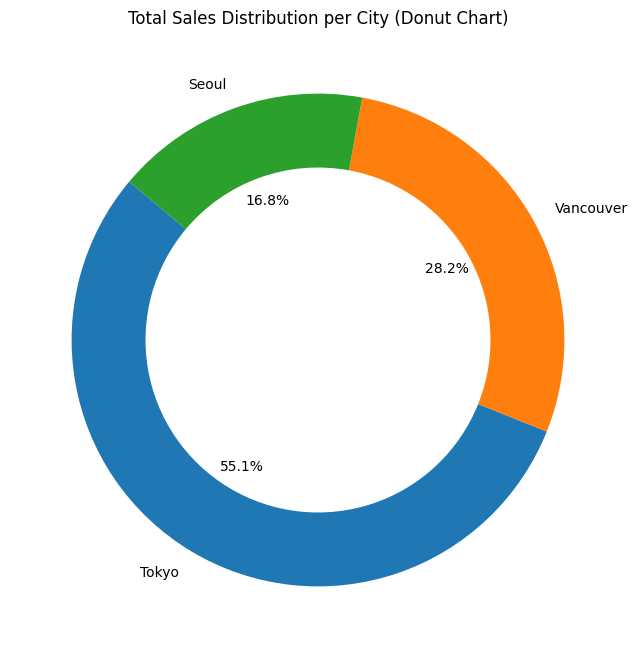

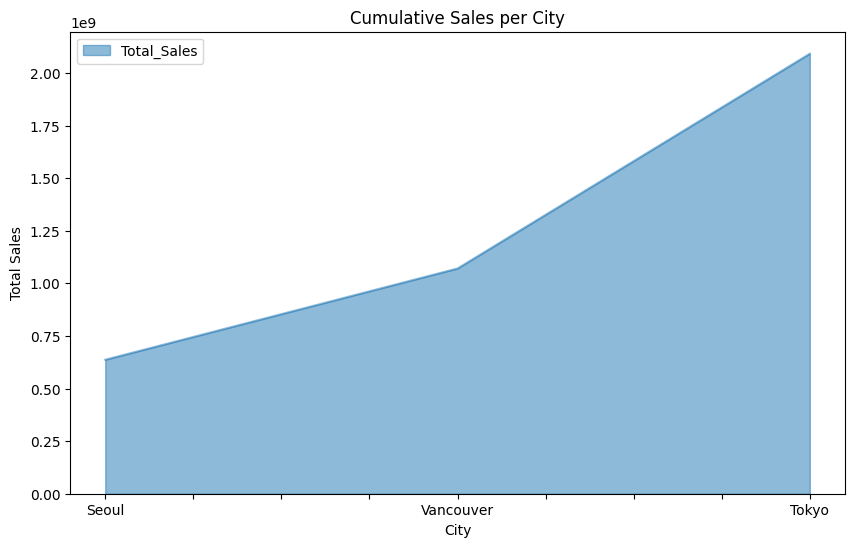

In [33]:
# Donut chart (similar to pie chart but with a hole in the middle)
plt.figure(figsize=(8, 8))
plt.pie(sales_per_city_pd['Total_Sales'], labels=sales_per_city_pd['City'], autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})
plt.title("Total Sales Distribution per City (Donut Chart)")
plt.show()

# Area plot (showing cumulative sales for each city)
sales_per_city_pd.set_index('City', inplace=True)
sales_per_city_pd.sort_values(by="Total_Sales", inplace=True)

sales_per_city_pd.plot(kind="area", figsize=(10, 6), alpha=0.5)
plt.title("Cumulative Sales per City")
plt.ylabel("Total Sales")
plt.xlabel("City")
plt.show()


In [34]:
# Group by City and Date, summing the Sales column
sales_trend_city = sales_df.groupBy("City", "Date").agg(_sum("Sales").alias("Total_Sales"))

# Show the result
sales_trend_city.show(truncate=False)


+---------+-------------------+--------------------+
|City     |Date               |Total_Sales         |
+---------+-------------------+--------------------+
|Tokyo    |2020-01-13 00:00:00|1.2840968490000013E7|
|Seoul    |2020-02-24 00:00:00|3895169.3299999996  |
|Vancouver|2020-07-28 00:00:00|6435480.729999998   |
|Tokyo    |2021-04-20 00:00:00|1.2328683410000011E7|
|Tokyo    |2020-03-03 00:00:00|1.4966950290000003E7|
|Vancouver|2020-04-21 00:00:00|6351127.300000001   |
|Seoul    |2020-01-13 00:00:00|3859742.14          |
|Tokyo    |2020-06-23 00:00:00|1.2961647920000015E7|
|Seoul    |2020-10-27 00:00:00|5403551.929999999   |
|Tokyo    |2020-04-21 00:00:00|1.2875829140000012E7|
|Vancouver|2020-02-10 00:00:00|6567346.259999998   |
|Tokyo    |2020-04-07 00:00:00|1.3575611420000007E7|
|Seoul    |2021-06-29 00:00:00|3603629.3799999985  |
|Tokyo    |2020-02-03 00:00:00|1.2568030300000006E7|
|Vancouver|2020-09-01 00:00:00|6049616.3500000015  |
|Seoul    |2020-06-23 00:00:00|3745853.7300000

**Cumulative Area Plot for sales Per City Over Time**

In [35]:
# Convert the Spark DataFrame to Pandas DataFrame for visualization
sales_trend_city_pd = sales_trend_city.toPandas()

# Ensure the Date column is in datetime format for proper plotting
sales_trend_city_pd['Date'] = pd.to_datetime(sales_trend_city_pd['Date'])

# Sort the data by Date for proper plotting
sales_trend_city_pd = sales_trend_city_pd.sort_values(by='Date')


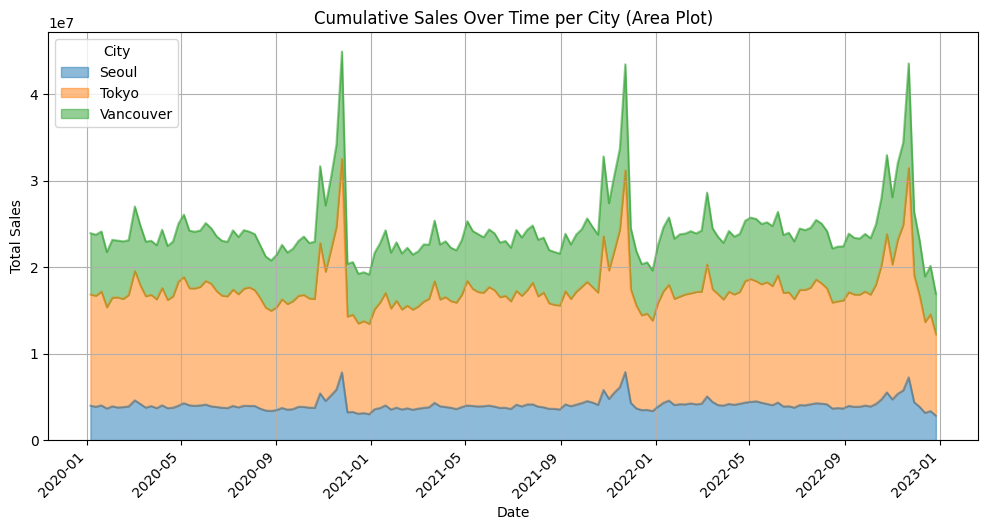

In [36]:
# Pivot the data so each city has its own column for total sales over time
pivot_data = sales_trend_city_pd.pivot(index='Date', columns='City', values='Total_Sales')

# Fill NaN values with 0 (if some dates don't have sales for certain cities)
pivot_data = pivot_data.fillna(0)

# Plot the area chart
pivot_data.plot(kind='area', figsize=(12, 6), alpha=0.5, stacked=True)

# Add titles and labels
plt.title("Cumulative Sales Over Time per City (Area Plot)")
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
